In [1]:
import pandas as pd

In [2]:
dataset = "MVC"
df = pd.read_csv(f"test_results_{dataset}_statistical_ablation.csv")
df = df[df["metric"] == "primal_integral"]

In [3]:
#check that both test are congruent
for test in ["wilcoxon", "ttest"]:
    for model in ["A", "B"]:
        aux = df[f"{test}_is_{model}_better"] == df[f"{test}_is_{model}_better"]
        assert aux.all(), f"NaN values found in column {test}_is_{model}_better"


In [4]:
df[["metric","Method A","Method B", "wilcoxon_is_A_better", "wilcoxon_is_B_better"]]

,metric,Method A,Method B,wilcoxon_is_A_better,wilcoxon_is_B_better
0,primal_integral,backpas-v0,backpas-net,False,True
1,primal_integral,backpas-v0,backpas-param,False,True
2,primal_integral,backpas-v0,backpas,False,True
3,primal_integral,backpas-v0,conpas,True,False
4,primal_integral,backpas-v0,gurobi,True,False
5,primal_integral,backpas-net,backpas-param,False,True
6,primal_integral,backpas-net,backpas,False,True
7,primal_integral,backpas-net,conpas,True,False
8,primal_integral,backpas-net,gurobi,True,False
9,primal_integral,backpas-param,backpas,False,True


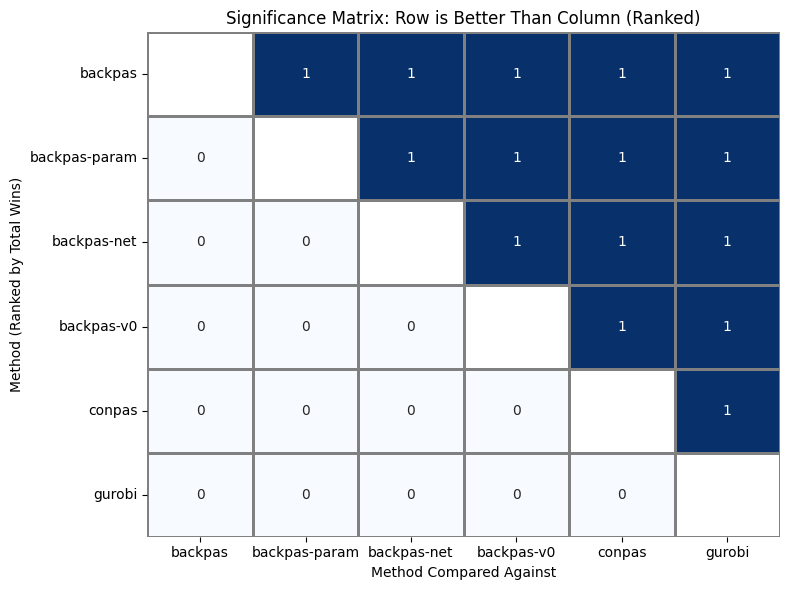

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare the Forward comparisons (Method A vs Method B)
# If A is better, cell (A, B) gets 1, otherwise 0
df_forward = pd.DataFrame({
    'Row_Method': df['Method A'],
    'Col_Method': df['Method B'],
    'Is_Better': df['wilcoxon_is_A_better'].astype(int)
})

# 2. Prepare the Backward comparisons (Method B vs Method A)
# If B is better, cell (B, A) gets 1, otherwise 0
df_backward = pd.DataFrame({
    'Row_Method': df['Method B'],
    'Col_Method': df['Method A'],
    'Is_Better': df['wilcoxon_is_B_better'].astype(int)
})

# 3. Concatenate to get all 30 directional results
df_full = pd.concat([df_forward, df_backward], ignore_index=True)

# 4. Pivot to create the 6x6 Matrix
matrix = df_full.pivot(index='Row_Method', columns='Col_Method', values='Is_Better')

# Set diagonal to NaN for clarity (methods don't fight themselves)
np.fill_diagonal(matrix.values, np.nan)
# Calculate the total wins for each method (sum of 1s in each row)
total_wins = matrix.sum(axis=1).sort_values(ascending=False)

# Re-index the matrix rows and columns based on the sorted order
sorted_methods = total_wins.index
matrix = matrix.reindex(index=sorted_methods, columns=sorted_methods)

# 5. Plot the Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    matrix, 
    annot=True, 
    cmap='Blues',      # 0 is White, 1 is Blue
    cbar=False,        # Color bar is less necessary for binary data
    linewidths=1, 
    linecolor='gray'
)

plt.title("Significance Matrix: Row is Better Than Column (Ranked)")
plt.xlabel("Method Compared Against")
plt.ylabel(f"Method (Ranked by Total Wins)")
plt.tight_layout()
plt.show()